In [50]:
import pandas as pd
import numpy as np
import re, os
from string import printable
from sklearn import model_selection

import tensorflow as tf
from keras.models import Sequential, Model, model_from_json, load_model
from keras import regularizers
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import *
from keras.preprocessing import sequence
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import backend as K
from sklearn.externals import joblib

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import os
import base64
import requests
import numpy as np
import pandas as pd
import itertools
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout, Flatten
from keras import callbacks
from keras.layers import LSTM, SimpleRNN, GRU
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import EarlyStopping, CSVLogger
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report




import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

from pathlib import Path
import json

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import itertools
%matplotlib inline


import matplotlib.pylab as plt
import scipy.sparse as sparse

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Data Preparation

In [3]:
filename = 'data-2.csv'
df = pd.read_csv(filename)
df.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [4]:
df.loc[df['label']=='good', 'label'] = 0
df.loc[df['label']=='bad', 'label'] = 1

In [5]:
df['label'].value_counts()

0    344821
1     75643
Name: label, dtype: int64

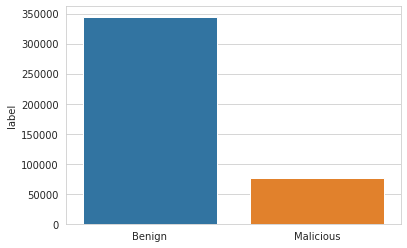

In [6]:
import seaborn
seaborn.set_style("whitegrid")

seaborn.barplot(x=['Benign','Malicious'], y=df['label'].value_counts())

## LSTM Model

In [53]:
max_len=400
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in df.url]
X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)
y = np.array(df.label)
print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (420464, 400) Vector dimension of target:  (420464,)


In [54]:
dummies = pd.get_dummies(y)
y = dummies.values.astype(np.float32) 

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [57]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(315348, 400) (315348, 2)
(105116, 400) (105116, 2)


In [59]:
max_fatures = 400
embed_dim = 150
lstm_out = 200
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

W0804 01:36:28.087601 140018106206016 deprecation_wrapper.py:119] From /home/keshavchaurasia/Desktop/codes/mp/campus/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 01:36:28.273261 140018106206016 deprecation_wrapper.py:119] From /home/keshavchaurasia/Desktop/codes/mp/campus/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 01:36:28.292312 140018106206016 deprecation_wrapper.py:119] From /home/keshavchaurasia/Desktop/codes/mp/campus/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 01:36:28.532917 140018106206016 deprecation_wrapper.py:119] From /home/keshavchaurasia/Desktop/codes/mp/campus/venv/lib/python3.6/site-packages/keras/backend/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 150)          60000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 341,202
Trainable params: 341,202
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
batch_size = 128
model.fit(X_train, y_train, nb_epoch = 3, batch_size=batch_size, verbose = 1)

Epoch 1/3
315348/315348 [==============================] - 4386s 14ms/step - loss: 0.2146 - acc: 0.9174
Epoch 2/3
315348/315348 [==============================] - 4260s 14ms/step - loss: 0.1211 - acc: 0.9568
Epoch 3/3
315348/315348 [==============================] - 4269s 14ms/step - loss: 0.0924 - acc: 0.9681


In [65]:
model.save("malware-url-lstm.hdf5")

In [104]:
model = load_model('malware-url-lstm.hdf5')

## Logistic Regression model

In [30]:
# Using Tokenizer
vectorizer = TfidfVectorizer()
url_list = df["url"]
# Store vectors into X variable as Our XFeatures
tfid = vectorizer.fit(url_list)
joblib.dump(tfid, 'tfid_vectorizer.pkl')

['tfid_vectorizer.pkl']

In [31]:
X = tfid.transform(url_list)

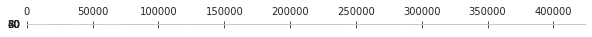

In [32]:
plt.figure(figsize=(10,100))
plt.spy(X[0:100,:])
plt.show()

In [33]:
y = df["label"].values

In [34]:
y=y.astype('int')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

In [36]:
print(X_train.shape)
print(y_train.shape)

(336371, 423929)
(336371,)


In [37]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print("Accuracy of our model is: ",logit.score(X_test, y_test))

Accuracy of our model is:  0.9644084525465854


In [39]:
# Save the model as a pickle in a file 
joblib.dump(logit, 'url_logistic_regression_classifier.pkl') 
  
# Load the model from the file 
url_classifier = joblib.load('url_logistic_regression_classifier.pkl') 

In [40]:
y_pred = url_classifier.predict(X_test)

Confusion matrix, without normalization
[[68567   352]
 [ 2641 12533]]


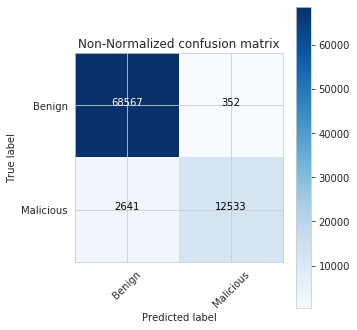

Normalized confusion matrix
[[0.99489256 0.00510744]
 [0.17404771 0.82595229]]


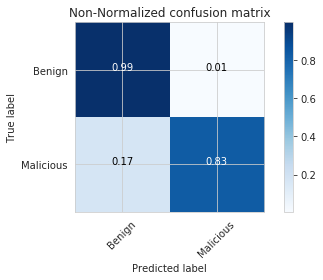

In [41]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['Benign','Malicious']
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=class_names, normalize=False,title='Non-Normalized confusion matrix')
plt.show()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['Benign','Malicious']))

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98     68919
   Malicious       0.97      0.83      0.89     15174

    accuracy                           0.96     84093
   macro avg       0.97      0.91      0.94     84093
weighted avg       0.96      0.96      0.96     84093



AUC: 0.990


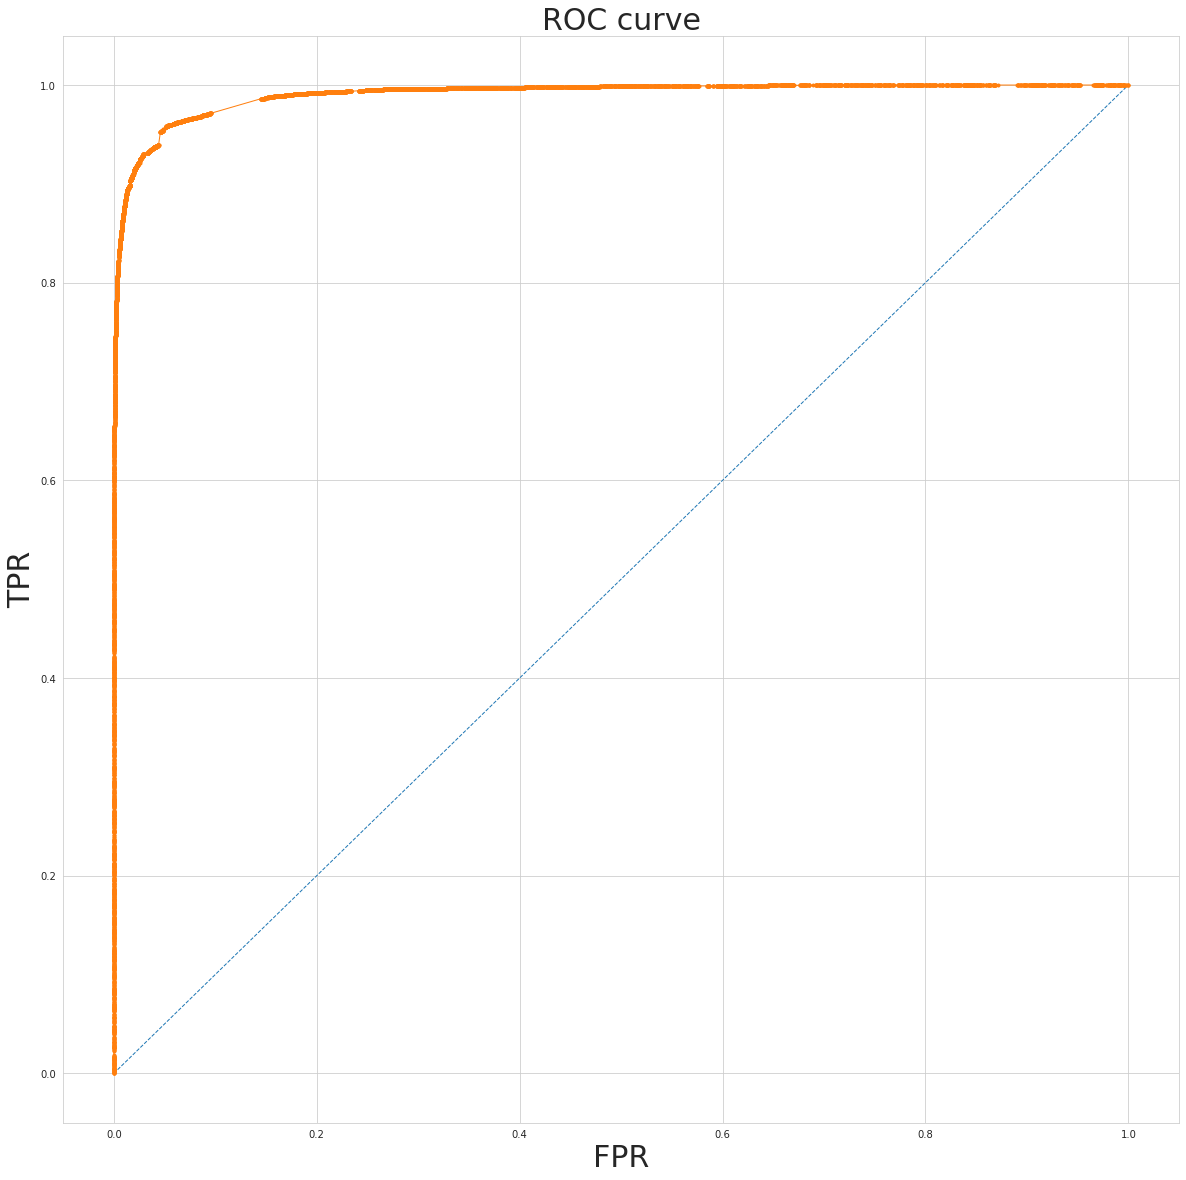

In [67]:
# predict probabilities
probs = url_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
plt.figure(figsize=(20,20))
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], lw=1,linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, lw=1,marker='.')
plt.xlabel('FPR',fontsize=30)
plt.ylabel('TPR',fontsize=30)
plt.title('ROC curve',fontsize=30)
plt.show()
# show the plot
plt.show()

In [5]:
printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [6]:
# Labels
y = df["isMalicious"]

# Features
url_list = df["url"]

In [14]:
# Using Tokenizer
vectorizer = TfidfVectorizer()

# Store vectors into X variable as Our XFeatures
tfid = vectorizer.fit(url_list)
joblib.dump(tfid, 'tfid_vectorizer.pkl')

['tfid_vectorizer.pkl']

In [15]:
X = tfid.transform(url_list)

In [16]:
# Split into training and testing dataset 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print("Accuracy of our model is: ",logit.score(X_test, y_test))

Accuracy of our model is:  0.935446611909651


In [19]:
# Save the model as a pickle in a file 
joblib.dump(logit, 'url_classifier.pkl') 
  
# Load the model from the file 
url_classifier = joblib.load('url_classifier.pkl')  
  
# Use the loaded model to make predictions 
url_classifier.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [70]:
tfid_vectorizer = joblib.load('tfid_vectorizer.pkl')
url_classifier = joblib.load('url_logistic_regression_classifier.pkl') 
url_link = 'stackoverflow.com'
if url_link:
    print(url_link)
    url_link=[url_link]
    X_test = tfid_vectorizer.transform(url_link)
    predict = url_classifier.predict(X_test)
    print(predict)

stackoverflow.com
[0]


In [81]:
f1 = "./dataset/Benign_list_big_final.csv"
f2 = "./dataset/Malware_dataset.csv"
df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df1.loc[df1['label']=='Benign', 'label'] = 0
df2.loc[df2['label']=='Malware', 'label'] = 1

In [82]:
dff = pd.concat([df1,df2],axis=0)

In [110]:
test_data = dff['url']
test_y = dff['label'].values

In [111]:
print(test_data.shape)
print(test_y.shape)

(46944,)
(46944,)


In [112]:
test_data = tfid.transform(test_data)

In [113]:
y_pred = logit.predict(test_data)

In [124]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[33666  1712]
 [ 8668  2898]]


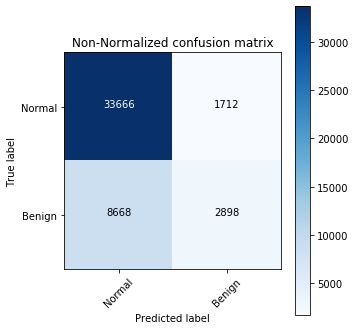

Normalized confusion matrix
[[0.95160834 0.04839166]
 [0.74943801 0.25056199]]


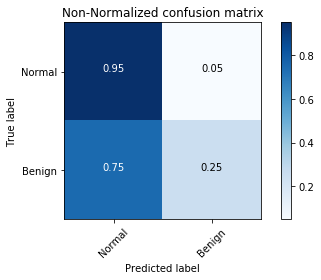

In [126]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

cm = confusion_matrix(list(dff['label'].values), y_pred)
class_names = ['Normal','Benign']
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=class_names, normalize=False,title='Non-Normalized confusion matrix')
plt.show()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Non-Normalized confusion matrix')
plt.show()

In [127]:
max_len=75
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in df.url]
X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)
target = np.array(df.isMalicious)
print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (194798, 75) Vector dimension of target:  (194798,)


In [128]:

X_train, X_test, target_train, target_test = model_selection.train_test_split(X, target, test_size=0.2, random_state=42)

In [129]:
def print_layers_dims(model):
    l_layers = model.layers
    for i in range(len(l_layers)):
        print(l_layers[i])
        print('Input Shape: ', l_layers[i].input_shape, 'Output Shape: ', l_layers[i].output_shape)


def save_model(fileModelJSON,fileWeights):
    if Path(fileModelJSON).is_file():
        os.remove(fileModelJSON)
    json_string = model.to_json()
    with open(fileModelJSON,'w' ) as f:
        json.dump(json_string, f)
    if Path(fileWeights).is_file():
        os.remove(fileWeights)
    model.save_weights(fileWeights)
    
def load_model(fileModelJSON,fileWeights):
    with open(fileModelJSON, 'r') as f:
         model_json = json.load(f)
         model = model_from_json(model_json)
    
    model.load_weights(fileWeights)
    return model

In [130]:
def simple_lstm(max_len=75, emb_dim=32, max_vocab_len=100, lstm_output_size=32, W_reg=regularizers.l2(1e-4)):
    main_input = Input(shape=(max_len,), dtype='int32', name='main_input')
    emb = Embedding(input_dim=max_vocab_len, output_dim=emb_dim, input_length=max_len,
                dropout=0.2, W_regularizer=W_reg)(main_input) 

    lstm = LSTM(lstm_output_size)(emb)
    lstm = Dropout(0.5)(lstm)
    
    output = Dense(1, activation='sigmoid', name='output')(lstm)

    model = Model(input=[main_input], output=[output])
    adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [133]:
epochs = 2
batch_size = 5

model = simple_lstm()
model.fit(X_train, target_train, epochs, batch_size)
loss, accuracy = model.evaluate(X_test, target_test, verbose=1)

print('\nFinal Cross-Validation Accuracy', accuracy, '\n')
print_layers_dims(model)

Epoch 1/5
155838/155838 [==============================] - 2794s 18ms/step - loss: 0.4128 - acc: 0.8165
Epoch 2/5
155838/155838 [==============================] - 2787s 18ms/step - loss: 0.3454 - acc: 0.8550
Epoch 3/5
155838/155838 [==============================] - 2793s 18ms/step - loss: 0.3148 - acc: 0.8698
Epoch 4/5
155838/155838 [==============================] - 2787s 18ms/step - loss: 0.2929 - acc: 0.8791
Epoch 5/5
38960/38960 [==============================] - 8s 209us/step

Final Cross-Validation Accuracy 0.8921201232032854 

Input Shape:  (None, 75) Output Shape:  (None, 75)
Input Shape:  (None, 75) Output Shape:  (None, 75, 32)
Input Shape:  (None, 75, 32) Output Shape:  (None, 32)
Input Shape:  (None, 32) Output Shape:  (None, 32)
Input Shape:  (None, 32) Output Shape:  (None, 1)


In [135]:
f1 = "./dataset/Benign_list_big_final.csv"
f2 = "./dataset/Malware_dataset.csv"
df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df1.loc[df1['label']=='Benign', 'label'] = 0
df2.loc[df2['label']=='Malware', 'label'] = 1

In [136]:
dff = pd.concat([df1,df2],axis=0)

In [137]:
test_data = dff['url']
test_y = dff['label'].values

In [138]:
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in test_data]
test_X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)

In [139]:
y_pred = model.predict(test_X)

Confusion matrix, without normalization
[[35378     0]
 [11566     0]]


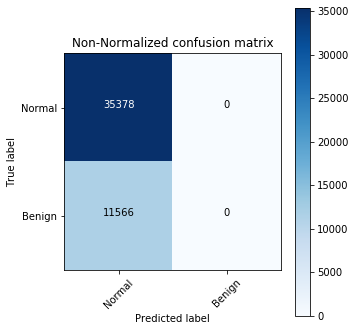

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


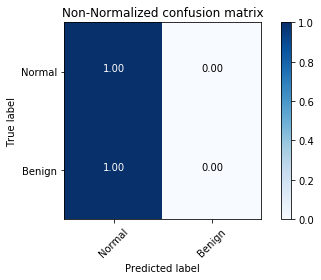

In [141]:
cm = confusion_matrix(list(dff['label'].values), np.argmax(y_pred,axis=1))
class_names = ['Normal','Benign']
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=class_names, normalize=False,title='Non-Normalized confusion matrix')
plt.show()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Non-Normalized confusion matrix')
plt.show()